# Trade data including exports and imports

In [14]:
import pandas as pd
import numpy as np

#import requests
import zipfile as zf 
from pathlib import Path
import matplotlib.pyplot as plt

### 0. Comment 3 cells below after data is downloaded and unzipped

In [15]:
'''
url="http://fenixservices.fao.org/faostat/static/bulkdownloads/Trade_DetailedTradeMatrix_E_All_Data_(Normalized).zip"
r = requests.get(url)
#300 MB dowload, slow...

filename = Path('Trade_DetailedTradeMatrix_E_All_Data_(Normalized).zip')
filename.write_bytes(r.content) 

files = zf.ZipFile('Trade_DetailedTradeMatrix_E_All_Data_(Normalized).zip', 'r')
files.extractall('')
files.close()
'''

'\nurl="http://fenixservices.fao.org/faostat/static/bulkdownloads/Trade_DetailedTradeMatrix_E_All_Data_(Normalized).zip"\nr = requests.get(url)\n#300 MB dowload, slow...\n\nfilename = Path(\'Trade_DetailedTradeMatrix_E_All_Data_(Normalized).zip\')\nfilename.write_bytes(r.content) \n\nfiles = zf.ZipFile(\'Trade_DetailedTradeMatrix_E_All_Data_(Normalized).zip\', \'r\')\nfiles.extractall(\'\')\nfiles.close()\n'

### You can just start here if you download the linked file and unzip it in the Data folder

In [16]:
pd_main = pd.read_csv('../../Data/raw_trade/Trade_DetailedTradeMatrix_E_All_Data_(Normalized).csv', sep=',', encoding='latin1')

In [17]:
print(pd_main["Year Code"].unique())
print(pd_main["Reporter Countries"].unique())


[2016 2004 2015 2005 2019 2014 1996 2012 1997 1999 2020 1998 2007 2021
 2013 2010 2008 2018 2009 2017 2000 2001 2011 2006 2003 1990 1993 2002
 1986 1987 1989 1988 1994 1991 1995 1992]
['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium'
 'Belgium-Luxembourg' 'Belize' 'Benin' 'Bhutan'
 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi'
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic'
 'Chile' 'China, Hong Kong SAR' 'China, Macao SAR' 'China, mainland'
 'China, Taiwan Province of' 'Colombia' 'Comoros' 'Congo' 'Cook Islands'
 'Costa Rica' "Côte d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia' 'Eswatini'
 'Ethiopia' 'Ethio

### OK about flags raised in some data points after reading this http://www.fao.org/3/i3664e/i3664e.pdf

Delete rows with same origin and destination, they relate to in-country free trade zones because "Special trade it also includes imports into and exports from customs warehouses sand free zones or ports. In Special trade goods are recorded when cleared through customs for shome use or for export. Special imports include goods for domestic consumption and withdrawals from bonded warehouses or free zones for purposes of domestic consumption.

Special exports comprise exports of goods wholly or partly produced or manufactured in the country, together with exports of "nationalized" goods;" 
see http://fenixservices.fao.org/faostat/static/documents/T/T_e.pdf 

In [18]:
pd_main.tail()

,Reporter Country Code,Reporter Country Code (M49),Reporter Countries,Partner Country Code,Partner Country Code (M49),Partner Countries,Item Code,Item Code (CPC),Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
46807394,150,'528,Netherlands (Kingdom of the),181,'716,Zimbabwe,564,'24212.02,Wine,5922,Export Value,1988,1988,1000 US$,1.0,A
46807395,150,'528,Netherlands (Kingdom of the),181,'716,Zimbabwe,564,'24212.02,Wine,5922,Export Value,1992,1992,1000 US$,8.0,A
46807396,150,'528,Netherlands (Kingdom of the),181,'716,Zimbabwe,564,'24212.02,Wine,5922,Export Value,1999,1999,1000 US$,2.0,A
46807397,150,'528,Netherlands (Kingdom of the),181,'716,Zimbabwe,564,'24212.02,Wine,5922,Export Value,2004,2004,1000 US$,2.0,A
46807398,150,'528,Netherlands (Kingdom of the),181,'716,Zimbabwe,564,'24212.02,Wine,5922,Export Value,2020,2020,1000 US$,14.0,A


In [19]:
same_country = pd_main.loc[(pd_main['Reporter Countries'] == pd_main['Partner Countries'])]
same_country.tail()

,Reporter Country Code,Reporter Country Code (M49),Reporter Countries,Partner Country Code,Partner Country Code (M49),Partner Countries,Item Code,Item Code (CPC),Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
43149165,203,'724,Spain,203,'724,Spain,892,'22230.02,"Yoghurt, with additives",5922,Export Value,2009,2009,1000 US$,3458.0,A
43149170,203,'724,Spain,203,'724,Spain,892,'22230.02,"Yoghurt, with additives",5922,Export Value,2010,2010,1000 US$,4103.0,A
43149179,203,'724,Spain,203,'724,Spain,892,'22230.02,"Yoghurt, with additives",5922,Export Value,2011,2011,1000 US$,12583.0,A
43149184,203,'724,Spain,203,'724,Spain,892,'22230.02,"Yoghurt, with additives",5922,Export Value,2012,2012,1000 US$,6860.0,A
43149193,203,'724,Spain,203,'724,Spain,892,'22230.02,"Yoghurt, with additives",5922,Export Value,2013,2013,1000 US$,9001.0,A


In [20]:
print('National-trade instances:',len(same_country.index))
print('International-trade instances:',len(pd_main.index) - len(same_country.index))

pd_impexp = pd_main.drop(pd_main[(pd_main['Reporter Countries'] == pd_main['Partner Countries'])].index)

print(len(pd_main.index))

National-trade instances: 64423
International-trade instances: 46742976
46807399


## 1. Keep useful columns: 
Remove some unused columns: Flag column and Year Flag column


In [21]:
useful_cols = ["Reporter Country Code","Reporter Countries","Partner Country Code","Partner Countries","Item","Element","Year","Unit","Value"]
pd_usecol = pd_impexp[useful_cols] 
print('Data after removal: ',len(pd_impexp.index))

Data after removal:  46742976


In [22]:
pd_usecol.head()

,Reporter Country Code,Reporter Countries,Partner Country Code,Partner Countries,Item,Element,Year,Unit,Value
0,2,Afghanistan,4,Algeria,"Cashew nuts, shelled",Export Quantity,2016,tonnes,3.0
1,2,Afghanistan,4,Algeria,"Cashew nuts, shelled",Export Value,2016,1000 US$,23.0
4,2,Afghanistan,4,Algeria,Crude organic material n.e.c.,Export Value,2015,1000 US$,1.0
5,4,Algeria,2,Afghanistan,"Almonds, shelled",Import Quantity,2005,tonnes,3.0
6,4,Algeria,2,Afghanistan,"Almonds, shelled",Import Value,2005,1000 US$,3.0


# 2. Understand unit and Element
**Unit:** can be specified in many different categories, we want to standardise it for the whole dataset so the values can be compared. \
**Element:** "Import Value / Quantities" or "Export Value / Quantities". 

Import Quantity / Export Quantity-> tonnes \
Import Value / Export Value -> money ($)

In [23]:
print(pd_usecol["Unit"].unique())

print(pd_usecol["Element"].unique())
pd_usecol.head(5)

['tonnes' '1000 US$' '1000 Head' 'Head' 'No']
['Export Quantity' 'Export Value' 'Import Quantity' 'Import Value']


,Reporter Country Code,Reporter Countries,Partner Country Code,Partner Countries,Item,Element,Year,Unit,Value
0,2,Afghanistan,4,Algeria,"Cashew nuts, shelled",Export Quantity,2016,tonnes,3.0
1,2,Afghanistan,4,Algeria,"Cashew nuts, shelled",Export Value,2016,1000 US$,23.0
4,2,Afghanistan,4,Algeria,Crude organic material n.e.c.,Export Value,2015,1000 US$,1.0
5,4,Algeria,2,Afghanistan,"Almonds, shelled",Import Quantity,2005,tonnes,3.0
6,4,Algeria,2,Afghanistan,"Almonds, shelled",Import Value,2005,1000 US$,3.0


In [24]:
# Check if element theory holds: 

imp_exp = 'Import' # 'Export' or 'Import'
quantity_tonnes = pd_usecol[(pd_usecol["Unit"] == 'tonnes') & (pd_usecol["Element"] == imp_exp + ' Quantity')] 
print( imp_exp + ', tonnes, quantity:',len(quantity_tonnes.index))

quantity_dollars = pd_usecol[(pd_usecol["Unit"] == '1000 US$') & (pd_usecol["Element"] == imp_exp + ' Quantity')] 
print( imp_exp + ', 1000US$, quantity:',len(quantity_dollars.index))

value_dollars = pd_usecol[(pd_usecol["Unit"] == '1000 US$') & (pd_usecol["Element"] == imp_exp + ' Value')] 
print( imp_exp + ', 1000US$, value:',len(value_dollars.index))

value_tonnes_exp= pd_usecol[(pd_usecol["Unit"] == 'tonnes') & (pd_usecol["Element"] == imp_exp + ' Value')] 
print( imp_exp + ', tonnes, value:',len(value_tonnes_exp.index))


Import, tonnes, quantity: 11593253
Import, 1000US$, quantity: 0
Import, 1000US$, value: 11823171
Import, tonnes, value: 0


Based on the assessment we can Homogenise the Text from Quantity / Value to only indicate "Import/Export" (Takes 2 min)

In [25]:
#pd_usecol.loc[:,'Element']= pd_usecol.Element.str.split().str[0] 

In [26]:
pd_usecol.loc[:,'Element']


0           Export Quantity
1              Export Value
4              Export Value
5           Import Quantity
6              Import Value
                 ...       
46807394       Export Value
46807395       Export Value
46807396       Export Value
46807397       Export Value
46807398       Export Value
Name: Element, Length: 46742976, dtype: object

## 3. Units: Keep only tonnes and USD 
Remove animals counted in units that have no clear translation to weight in tonnes (I tried, but there is no sensible source that provides homogeneous values across world regions). As shown below, it is less than 1% of the data.

**Unit values**

No= "Bees"\
1000 Head= Animals (chicken, birds, ducks, rabbits... geese)\
Head= Animals (goat, cattle, rodents, asses, camel, mule, buffalo)\
tonnes = other products


In [27]:
# test
print(pd_usecol["Unit"].unique())
# test
test = pd_usecol[(pd_usecol["Unit"] == "No") ]
#'1000 Head' 'Head' 'No'
print(test["Item"].unique())

# Remove animal data: only keep data with unit: 'tonnes'or '1000 US$'.
pd_usedata = pd_usecol[(pd_usecol["Unit"] == 'tonnes') | (pd_usecol["Unit"] == '1000 US$')] 
print(pd_usedata["Unit"].unique())
print('Samples in Tonnes or $:',pd_usecol.shape[0])
print('Percentage of overlapping data',100*pd_usedata.shape[0]/pd_usecol.shape[0])

['tonnes' '1000 US$' '1000 Head' 'Head' 'No']
['Bees']
['tonnes' '1000 US$']
Samples in Tonnes or $: 46742976
Percentage of overlapping data 99.40776770396477


## 4. Remove Redundant Items
FAOSTAT responded via email that "Rice, paddy (rice milled equivalent)" is a summation of other included rice trades, and the only aggregated value that would lead to double counting, thus we eliminate it to keep greater detail

In [28]:
pd_usedata = pd_usedata[(pd_usedata["Item"] != 'Rice, paddy (rice milled equivalent)') ] 

## 5. Quality check

Below a satisfactory quality check based on the web interface of faostat: http://www.fao.org/faostat/en/#rankings/countries_by_commodity_imports

##### Top 20 Country Importers, Import Quantity of Wheat
##### 2018


Area
Item
Year
Value
Unit
Flag
Flag Description
Egypt	Wheat	2018	12522275.27	t	-	-
Indonesia	Wheat	2018	10096298.93	t	-	-
Algeria	Wheat	2018	8422056.96	t	-	-
Italy	Wheat	2018	7453326.38	t	-	-
Brazil	Wheat	2018	6817138.26	t	-	-
Philippines	Wheat	2018	6690772.39	t	-	-
Spain	Wheat	2018	6028087.66	t	-	-
Türkiye	Wheat	2018	5781711.54	t	-	-
Japan	Wheat	2018	5652192.67	t	-	-
Netherlands (Kingdom of the)	Wheat	2018	5566984.97	t	-	-
Viet Nam	Wheat	2018	5318644.73	t	-	-
Mexico	Wheat	2018	4920401.06	t	-	-
Bangladesh	Wheat	2018	4839308.1	t	-	-


In [29]:
year = 2021
element= "Import Quantity"
product = "Wheat"

wheat = pd_usecol[(pd_usecol["Year"] == year) & (pd_usecol["Element"] == "Import Quantity") & (pd_usecol["Item"] == "Wheat") ]
top_imports = wheat.groupby('Reporter Countries')['Value'].sum().reset_index()
top_imports_sorted = top_imports.sort_values(by='Value', ascending=False).reset_index()

# Value top 
wheat_val = pd_usecol[(pd_usecol["Year"] == year) & (pd_usecol["Element"] == "Import Value") & (pd_usecol["Item"] == "Wheat") ]
top_imports_val = wheat_val.groupby('Reporter Countries')['Value'].sum().reset_index()
top_imports_sorted_val = top_imports_val.sort_values(by='Value', ascending=False).reset_index()


In [30]:
top_imports_sorted_val.head(10)

,index,Reporter Countries,Value
0,73,Indonesia,3548356.0
1,33,"China, mainland",3038666.0
2,155,Türkiye,2692626.0
3,1,Algeria,2558744.0
4,77,Italy,2270476.0
5,49,Egypt,2179948.0
6,10,Bangladesh,2149529.0
7,112,Nigeria,2055030.0
8,122,Philippines,1948671.0
9,20,Brazil,1850965.0


/tmp/ipykernel_3072016/4233565828.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(top_imports_sorted.loc[0:9,'Reporter Countries'],rotation=50,ha='right')
/tmp/ipykernel_3072016/4233565828.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(top_imports_sorted_val.loc[0:9,'Reporter Countries'],rotation=50)


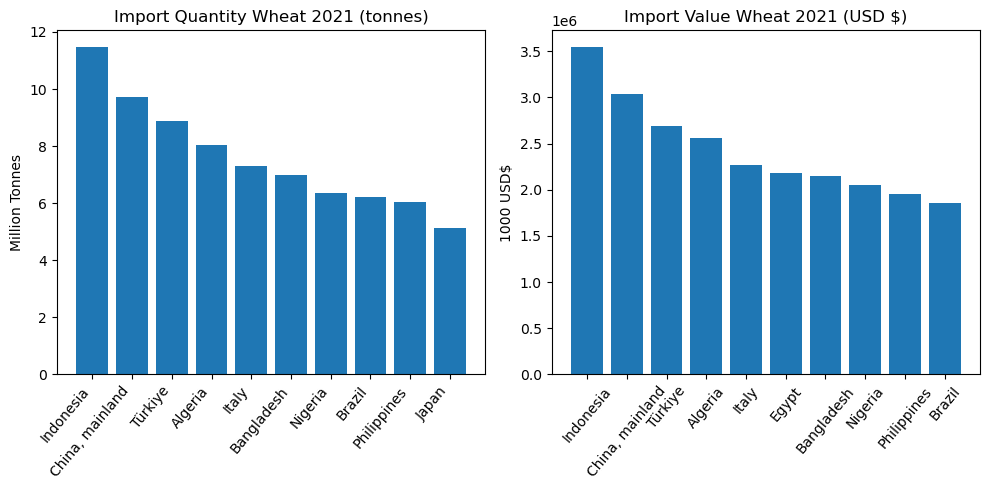

In [31]:
# Plot quantity
fig, axs = plt.subplots(1,2,figsize=(10,5))
element= "Import Quantity"
axs[0].bar(top_imports_sorted.loc[0:9,'Reporter Countries'],top_imports_sorted.loc[0:9,'Value']/1e6)
axs[0].set_xticklabels(top_imports_sorted.loc[0:9,'Reporter Countries'],rotation=50,ha='right')
axs[0].set_title(element +' ' + product + ' '+ str(year) + ' (tonnes)')
axs[0].set_ylabel('Million Tonnes')

#Plot value 
element= "Import Value"
axs[1].bar(top_imports_sorted_val.loc[0:9,'Reporter Countries'],top_imports_sorted_val.loc[0:9,'Value'])
axs[1].set_xticklabels(top_imports_sorted_val.loc[0:9,'Reporter Countries'],rotation=50)
axs[1].set_title(element +' ' + product + ' '+ str(year) + ' (USD $)')
axs[1].set_ylabel('1000 USD$')
plt.tight_layout()

In [32]:
# Non overlap: Sudan for imports in $. 

# Check if wheat for sudan in 2018 exists in OG data:
wheat_og= pd_main[(pd_main["Year"] == year) & (pd_main["Element"] == element) & (pd_main["Item"] == product) & (pd_main["Reporter Countries"] == "Sudan")  ]


wheat_usecol= pd_usecol[(pd_usecol["Year"] == year) & (pd_usecol["Element"] == element) & (pd_usecol["Item"] == product) & (pd_usecol["Reporter Countries"] == "South Sudan")  ]
wheat_usecol
# Sudan Not found in downloaded data 
# Iran Wheat 2021 not found in downloaded data 
wheat_usecol.Value.sum()

0.0

In [35]:
pd_usedata.to_csv('../../Data/Trade_filtered.csv',encoding = 'utf-8') #save data 


## 6. Reconciliation
**We have to take into account the following:**

"In the construction of trade matrices, one should consider that the same trade flow can be reported twice in the FAOSTAT database, once by the exporting country and once by the importing country. When a trade flow is reported by only one of the two countries, the reported flow is used to construct the matrix (single record); this is the case for 40 % of records in the database. All other records are “double” (reported twice) and require a comparison between the declarations of the exporting and the importing countries, which are usually different, with a mean (absolute) relative difference, across all goods, countries, and years, of 61%. The choice of a value from two double records is called “reconciliation”, and the method adopted here is based on the identification of the most reliable reporting country among the two involved in each flow, and the use of the flow being reported by it. The reliability of countries is measured per commodity and per year with a data-based approach detailed below and adapted from Gehlhar (1996)." Source: https://doi.org/10.5194/essd-13-2025-2021 (they also provide guidance on country changes at the end of the supplementary material, see "Associations" at https://essd.copernicus.org/preprints/essd-2020-226/essd-2020-226-supplement.pdf)


The team behind the paper above computes a country reliability formula and selects which source of information to keep for duplicated entries (when both countries report the flow)


**This index is easier to apply in R, hence I move from here to R Studio.**

